# Project 2: Ames Housing EDA Analysis

## Problem Statement

As part of the Ames real estate consulting agency, my team is tasked with creating a **regression based model to predict the housing price using the Ames Housing Dataset** to assist real estate agents with their day to day tasks. Currently, the real estate agents make use of their domain knowledge, search through the web to help them or rely on outdated spreadsheets containing the sale prices to provide estimated prices for their clients. This is time-consuming and cumbersome. With a model, the agents can make quick and effective decisions in creating sale prices for the houses in Ames.

## Executive Summary

The project reviews the data covering the extensive features of the Ames Housing dataset to construct a regression model to predict the sale prices of the house. The data is has many features, such the year built, renovated, the square feet of the basements and rooms. Analysis of the dataset involves find strong positive and negative correlations between the features and the saleprice to be used in constructing the model. Of the 4 models that were created, Linear, Ridge, Lasso and ElasticNet Regression, Lasso Regression model had the best score. 


### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Rename the columns](#Rename-Columns)
- [Checking for correlation of features between SalePrice](#Checking-for-correlation-of-features-between-SalePrice)
- [Remove Outliers](#Removing-the-outliers)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

In [1]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
# Import graph style
plt.style.use('fivethirtyeight')

In [3]:
# Set the max rows and columns for Pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

## Data Import and Cleaning

#### 1. Read In Data

Read in the`.csv` files

In [4]:
# Open the training set CSV data files
train_df = pd.read_csv('../datasets/train.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe

In [2436]:
# View first 10 rows
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [2437]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### Data Description

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from *2006 to 2010*.

A total of **2930 observations** and **81 columns** can be found in the data set.

Variables are categorized into the following:
* 23 nominal, 
* 23 ordinal, 
* 14 discrete
* 20 continuous variables 
* 2 additional observation identifiers

[Description of dataset features](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

# Cleaning the dataset

In [2438]:
# Define a funtion to check the percentage of missing values
def pct_missing_value(data,col):
    missing_dict = dict()
    for c in col:
        missing_dict[c] = round((data[c].isnull().sum() / len(data[c])) * 100,2)
    return missing_dict

In [2439]:
dict_missing = pct_missing_value(train_df, ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
                                            'Lot Frontage', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
                                            'Garage Cond', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
                                            'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Area',
                                            'Mas Vnr Type', 'Bsmt Half Bath', 'Bsmt Full Bath'])
dict_missing

{'Pool QC': 99.56,
 'Misc Feature': 96.83,
 'Alley': 93.17,
 'Fence': 80.5,
 'Fireplace Qu': 48.76,
 'Lot Frontage': 16.09,
 'Garage Yr Blt': 5.56,
 'Garage Finish': 5.56,
 'Garage Qual': 5.56,
 'Garage Cond': 5.56,
 'Garage Type': 5.51,
 'Bsmt Exposure': 2.83,
 'BsmtFin Type 2': 2.73,
 'BsmtFin Type 1': 2.68,
 'Bsmt Cond': 2.68,
 'Bsmt Qual': 2.68,
 'Mas Vnr Area': 1.07,
 'Mas Vnr Type': 1.07,
 'Bsmt Half Bath': 0.1,
 'Bsmt Full Bath': 0.1}

<AxesSubplot:title={'center':'Mising values for each feature'}, xlabel='Features', ylabel='%'>

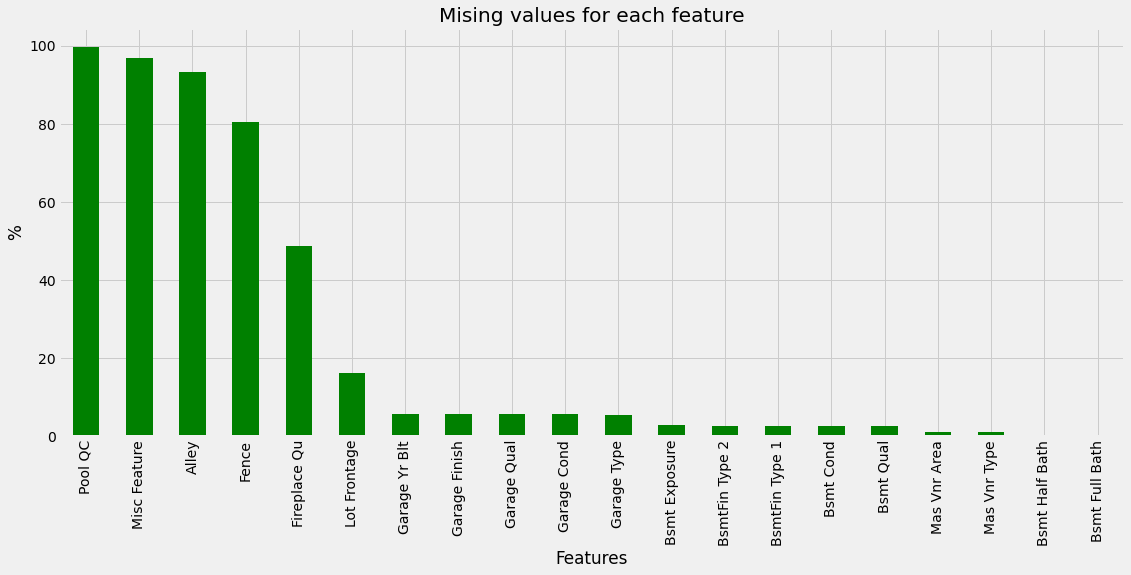

In [2440]:
missing_data_pct = pd.Series(dict_missing)
missing_data_pct.plot(kind='bar', figsize=(17, 7), color='green',
                      title='Mising values for each feature', xlabel='Features', ylabel='%')

Top missing values in the data set, **drop the columns with percentages greater than 80%**

These features will be dropped: *'Pool QC', 'Misc Feature', 'Alley', 'Fence'*. 

In [2441]:
train_df = train_df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [2442]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [2443]:
# Columns to drop: 'PID', no correlation with price
# Will use Id as reference when merging data frames

train_df = train_df.drop(['Id', 'PID'], axis=1)
train_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


### Selecting the numeric variables

In [2444]:
# Select the numeric variables with int64, float64

# Overall Qual, Overall Cond are ordinal variables in the train_df_num, will need to drop them and add to the train_df_cat

train_df_num = train_df.select_dtypes(['int64', 'float64']).drop(
    ['Kitchen AbvGr', 'Overall Qual', 'Overall Cond'], axis=1).copy()
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


### Selecting the categorical variables

In [2445]:
# Select the categorical variables
train_df_cat = train_df.select_dtypes(['object']).copy()
train_df_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD


### Cleaning the train_df_cat

In [2446]:
train_df_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD


In [2447]:
train_df_cat.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

For train_df_cat,

**Nominal variables:**
* MS SubClass (Type of subclass)
* Ms Zoning
* Street (Gravel or Pavel) (Change to 0,1)
* Land Contour
* Lot Config
* Neighbourhood
* Condition 1 and Condition 2 (Proxmity to various locations)
* Bldg Type (Type of dwelling)
* House style (Type of dwelling)
* Roof Style
* Roof Matl
* Exterior 1st and Exterior 2nd
* Mas Vnr Type
* Foundation 
* Heating
* Central Air (Change to 0,1)
* Garage Type
* Sale Type


**Ordinal variables:**
* Lot Shape (Regular, slightly irregular ..)
* Utilities
* Land Slope (Gentle, moderate .. slope)
* Exter Qual (quality of the material on the exterior)
* Exter Cond (present condition of the material on the exterior)
* Bsmt Qual (height of the basement)
* Bsmt Exposure
* BsmtFin Type 1
* BsmtFin Type 2
* HeatingQC
* Electrical
 * SBrkr	Standard Circuit Breakers & Romex,  (5)
 * FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	 (4)
 * FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair) (3)
 * FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor) (2)
 * Mix	Mixed (1)
* KitchenQual
* Kitchen AbvGr
* Functional (Home functionality)
* Garage Cond
* Paved Drive

In [2448]:
# Adding back MS SubClass, Kitchen AbvGr to train_df_Cat
train_df_cat.insert(0, 'MS SubClass', train_df['MS SubClass'])
train_df_cat.insert(30, 'Kitchen AbvGr', train_df['Kitchen AbvGr'])

In [2449]:
train_df_cat

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen AbvGr,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,60,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD
1,60,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,1,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,WD
3,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,1,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,WD
4,50,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,1,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD
2047,30,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,1,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD
2048,50,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,1,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,WD
2049,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,1,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD


In [2450]:
# FROM here, only change the values for train_df
# Need to map the values MS SubClass to their categories
train_df['MS SubClass'] = train_df['MS SubClass'].map({
    20:'1-STORY 1946 & NEWER ALL STYLES',
    30:'1-STORY 1945 & OLDER',
    40:'1-STORY W/FINISHED ATTIC ALL AGES',
    45:'-1/2 STORY - UNFINISHED ALL AGES',
    50:'1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120 : '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

In [2451]:
train_df['MS SubClass']

0                  2-STORY 1946 & NEWER
1                  2-STORY 1946 & NEWER
2       1-STORY 1946 & NEWER ALL STYLES
3                  2-STORY 1946 & NEWER
4         1-1/2 STORY FINISHED ALL AGES
                     ...               
2046    1-STORY 1946 & NEWER ALL STYLES
2047               1-STORY 1945 & OLDER
2048      1-1/2 STORY FINISHED ALL AGES
2049    1-STORY 1946 & NEWER ALL STYLES
2050               2-STORY 1946 & NEWER
Name: MS SubClass, Length: 2051, dtype: object

In [2452]:
# Converting the values to lower case and added underscores to replace the space later for one hot encoding
train_df['MS SubClass'] = train_df['MS SubClass'].map(lambda x:x.lower().replace(' ', '_').replace('-',''))

In [2453]:
train_df_cat['MS SubClass']

0       60
1       60
2       20
3       60
4       50
        ..
2046    20
2047    30
2048    50
2049    20
2050    60
Name: MS SubClass, Length: 2051, dtype: int64

In [2454]:
train_df_null_pct = ((train_df.isnull().sum() / len(train_df)).sort_values(ascending=False) * 100).head(11)
train_df_null_pct

Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Finish      5.558264
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Qual        5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Qual          2.681619
Bsmt Cond          2.681619
dtype: float64

In [2455]:
cat_null = train_df_null_pct.index.tolist()
cat_null

['Fireplace Qu',
 'Lot Frontage',
 'Garage Finish',
 'Garage Yr Blt',
 'Garage Cond',
 'Garage Qual',
 'Garage Type',
 'Bsmt Exposure',
 'BsmtFin Type 2',
 'Bsmt Qual',
 'Bsmt Cond']

<AxesSubplot:title={'center':'Null values for each variable as a percentage'}, xlabel='Variables', ylabel='% format'>

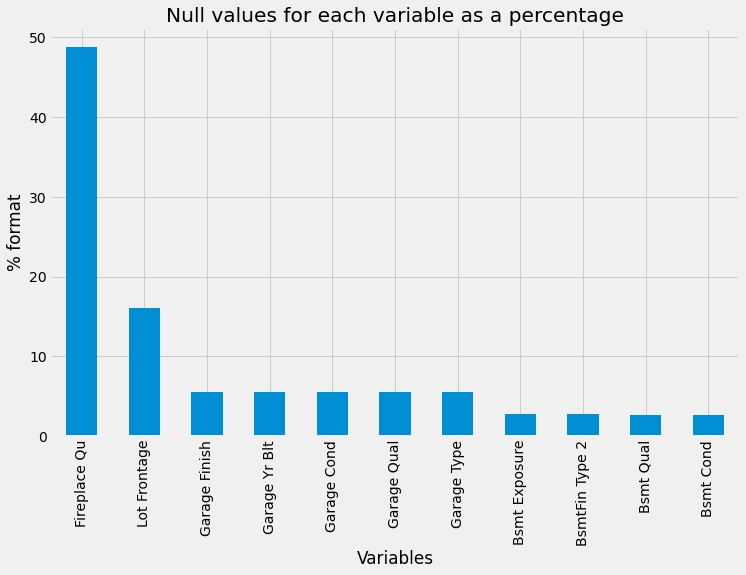

In [2456]:
train_df_null_pct.plot(kind='bar', figsize=(11,7),
                           title='Null values for each variable as a percentage',xlabel='Variables', ylabel='% format')

In [2457]:
# Mode of the columns with null values
# mode_values = train_df_cat[cat_null].mode()
# mode_values

# Don't fill the NA values for categorical values as they're part of the category

In [2458]:
# Fill the null values with the mode of each column
# train_df_cat = train_df_cat.fillna(agg_dict(train_df_cat,mode_values))
# train_df_cat.isnull().sum().sort_values(ascending=False)

# Don't fill the NA values for categorical values as they're part of the category

### Need to split between Nominal and Ordinal variables into their dataframes

The Nominal variables will have one hot encoding while the Ordinal variables will have ordinal encoding

In [2459]:
# Nominal variables
train_df_nom= train_df[[
    'MS SubClass',
    'MS Zoning',
    'Street', 
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Condition 1',
    'Condition 2', 
    'Bldg Type', 
    'House Style', 
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Mas Vnr Type',
    'Foundation',
    'Heating',
    'Central Air',
    'Garage Type',
    'Sale Type',
]].copy()

train_df_nom.head()

,MS SubClass,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Sale Type
0,2story_1946_&_newer,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,WD
1,2story_1946_&_newer,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,WD
2,1story_1946_&_newer_all_styles,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,WD
3,2story_1946_&_newer,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,WD
4,11/2_story_finished_all_ages,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,WD


In [2460]:
# Oridinal variables 
train_df_ord = train_df_cat[[col for col in train_df_cat.columns if col not in train_df_nom.columns]].copy()
train_df_ord.head()

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen AbvGr,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive
0,IR1,AllPub,Gtl,Gd,TA,TA,TA,No,GLQ,Unf,Ex,SBrkr,1,Gd,Typ,NaN,RFn,TA,TA,Y
1,IR1,AllPub,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,SBrkr,1,Gd,Typ,TA,RFn,TA,TA,Y
2,Reg,AllPub,Gtl,TA,Gd,TA,TA,No,GLQ,Unf,TA,SBrkr,1,Gd,Typ,NaN,Unf,TA,TA,Y
3,Reg,AllPub,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Gd,SBrkr,1,TA,Typ,NaN,Fin,TA,TA,Y
4,IR1,AllPub,Gtl,TA,TA,Fa,Gd,No,Unf,Unf,TA,SBrkr,1,TA,Typ,NaN,Unf,TA,TA,N


### Cleaning the train_df_num

<AxesSubplot:title={'center':"Numeric Dataframe Columns with 0's in them"}>

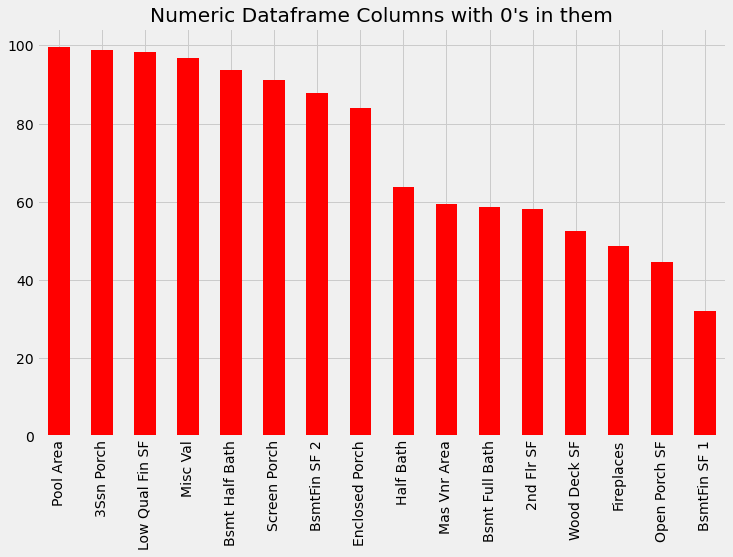

In [2461]:
# Count the columns with values with 0's in them
train_df_with_0 = (((train_df.isin([0]).sum() / len(train_df)) * 100).sort_values(ascending=False)).iloc[:16]

train_df_with_0.sort_values(ascending=False).plot(kind='bar',
                                                  figsize=(11, 7), title='Numeric Dataframe Columns with 0\'s in them', color='red')

In [2462]:
train_df_with_0

Pool Area          99.561190
3Ssn Porch         98.732326
Low Qual Fin SF    98.391029
Misc Val           96.830814
Bsmt Half Bath     93.759142
Screen Porch       91.175037
BsmtFin SF 2       87.908337
Enclosed Porch     84.056558
Half Bath          63.773769
Mas Vnr Area       59.288152
Bsmt Full Bath     58.508045
2nd Flr SF         58.069235
Wood Deck SF       52.413457
Fireplaces         48.756704
Open Porch SF      44.466114
BsmtFin SF 1       32.033155
dtype: float64

In [2463]:
# Find the correlation for features will 0's in them with SalePrice
train_df_with_0 = pd.concat([train_df[train_df_with_0.index],train_df['SalePrice']],axis=1)
train_df_with_0.head()

,Pool Area,3Ssn Porch,Low Qual Fin SF,Misc Val,Bsmt Half Bath,Screen Porch,BsmtFin SF 2,Enclosed Porch,Half Bath,Mas Vnr Area,Bsmt Full Bath,2nd Flr SF,Wood Deck SF,Fireplaces,Open Porch SF,BsmtFin SF 1,SalePrice
0,0,0,0,0,0.0,0,0.0,0,1,289.0,0.0,754,0,0,44,533.0,130500
1,0,0,0,0,0.0,0,0.0,0,1,132.0,1.0,1209,0,1,74,637.0,220000
2,0,0,0,0,0.0,0,0.0,0,0,0.0,1.0,0,0,0,52,731.0,109000
3,0,0,0,0,0.0,0,0.0,0,1,0.0,0.0,700,100,0,0,0.0,174000
4,0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,614,0,0,59,0.0,138500


In [5]:
def corr_heatmap(dataframe, label='test', cmap='coolwarm'):
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(25,20))

    sns.heatmap(dataframe.corr(), annot=True, mask=mask, cmap=cmap, annot_kws={'fontsize':14})
    plt.title('Correlation of features of ' + label + ' variables')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

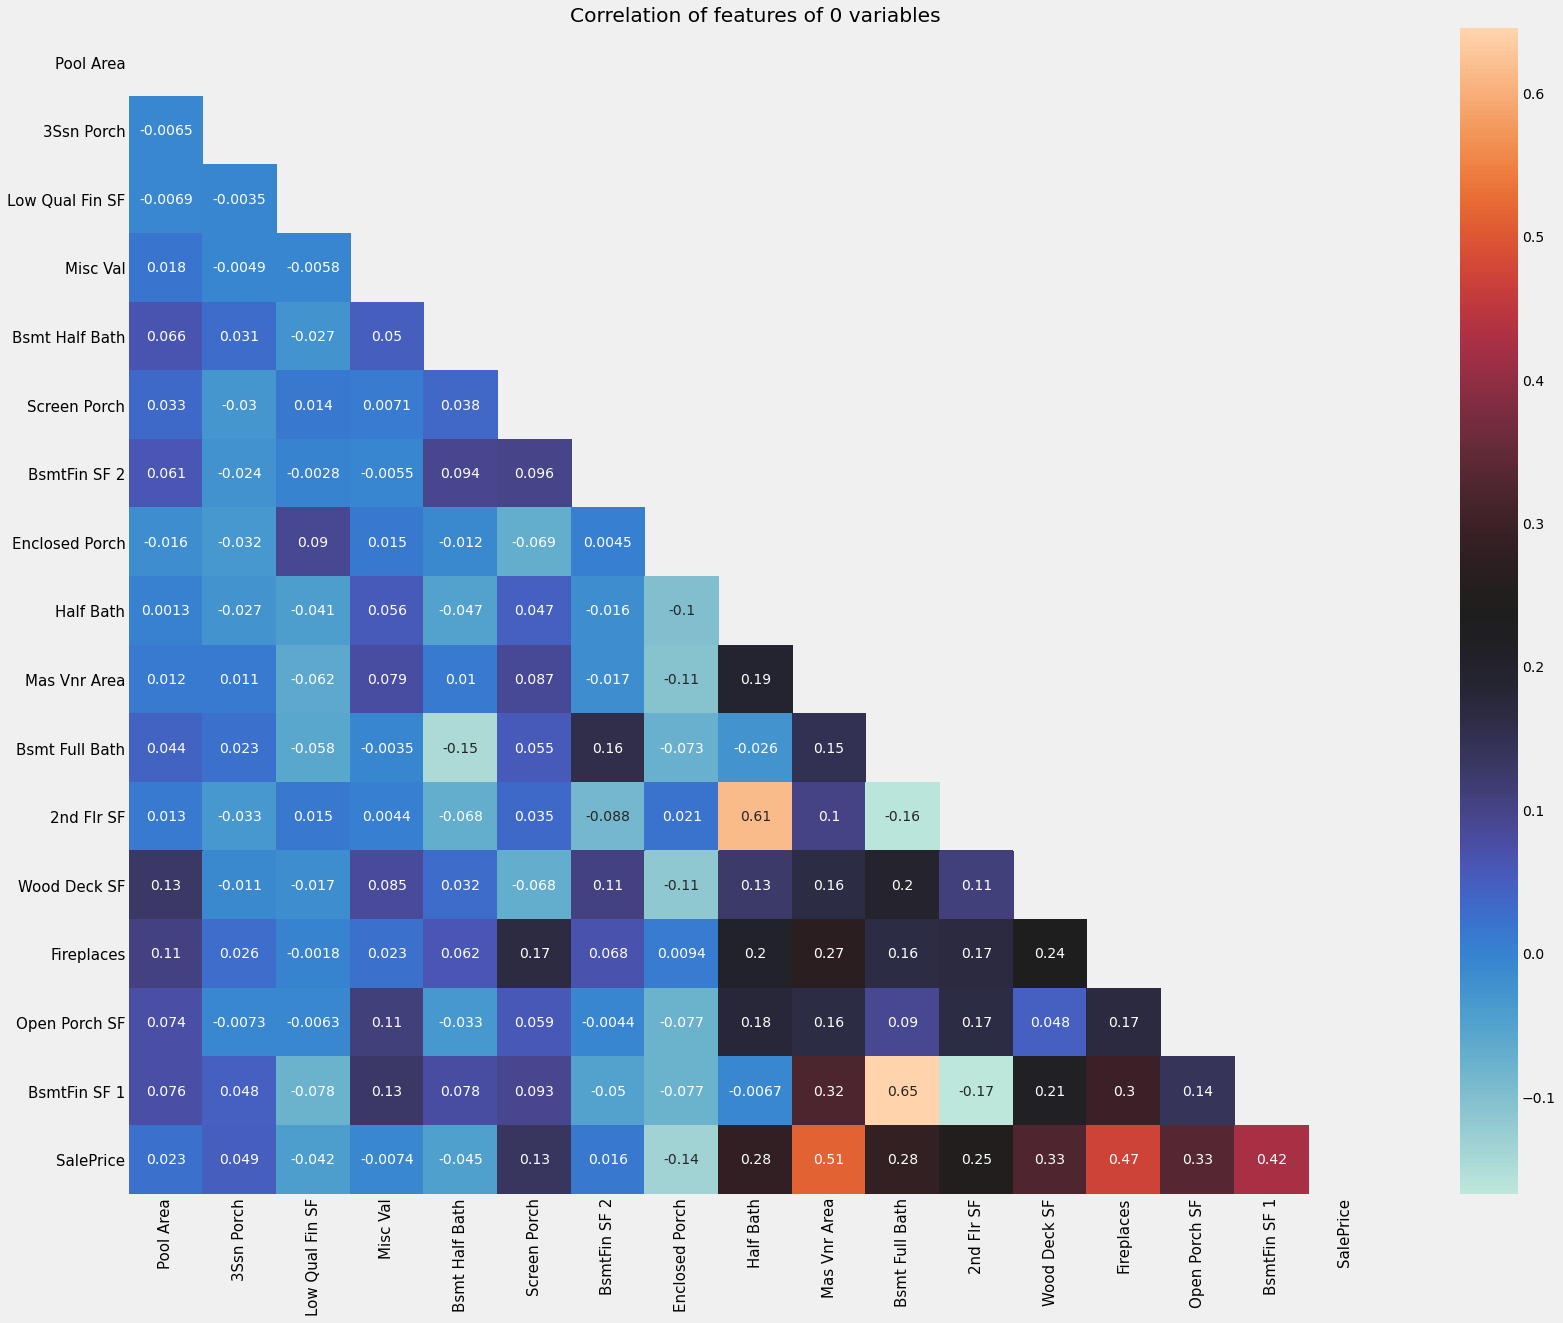

In [2465]:
# Heatmap correlation of columns with 0's with SalePrice

corr_heatmap(train_df_with_0, '0', 'icefire')

In [6]:
def single_corr_heatmap(dataframe, feature, colormap='icefire'):
    df_corr = pd.DataFrame(dataframe.corr()[feature]).sort_values(feature, ascending=False)
    plt.figure(figsize=(11,7))
    sns.heatmap(df_corr, cmap=colormap, annot=True)
    if len(feature) > 1:
        plt.title('Correlation of numeric features with ' + ", ".join(feature), fontsize=15, pad=15)
    else:
        plt.title('Correlation of numeric features with ' + "".join(feature), fontsize=15, pad=15)
    plt.xlabel('')
    plt.ylabel('')

# single_corr_heatmap(train_df_with_0, ['SalePrice'])

In [10]:
single_corr_heatmap(train_df_with_0, ['SalePrice'])

NameError: name 'train_df_with_0' is not defined

In [2468]:
train_df_with_0.columns

Index(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Half Bath', 'Mas Vnr Area', 'Bsmt Full Bath', '2nd Flr SF',
       'Wood Deck SF', 'Fireplaces', 'Open Porch SF', 'BsmtFin SF 1',
       'SalePrice'],
      dtype='object')

Based on the correlation heatmap, the following numeric columns with a lot of 0's in them have **very little correlation with price**:
* Pool Area (99.5%, 0.023) (Almost all houses do not have pools, will **drop pool related features**)
* 3Ssn Porch (98.7%, 0.049)
* Low Qual Fin SF (98.39%, -0.042)
* Misc Val (96.83%, -0.0074) (Almost all houses do not have Miscellaneous features)
* Bsmt Half Bath (93.7%, -0.045) 
* Screen Porch (91.17%, 0.13)
* BsmtFin SF 2 (87.9%, 0.016)
* Enclosed Porch (84.05%, -0.14)
* Bsmt Unf SF (8.04%, 0.19)

**These features will be dropped in train_df_num**

In [2469]:
# Drop the numeric columns with the most 0's and with the least correlation against price
train_df = train_df.drop(['Pool Area', '3Ssn Porch', 'Low Qual Fin SF', 'Misc Val',
       'Bsmt Half Bath', 'Screen Porch', 'BsmtFin SF 2', 'Enclosed Porch',
       'Bsmt Unf SF'], axis=1)
train_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2story_1946_&_newer,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725,754,1479,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,3,2010,WD,130500
1,2story_1946_&_newer,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913,1209,2122,1.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,4,2009,WD,220000
2,1story_1946_&_newer_all_styles,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057,0,1057,1.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,1,2010,WD,109000
3,2story_1946_&_newer,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744,700,1444,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,4,2010,WD,174000
4,11/2_story_finished_all_ages,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831,614,1445,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,3,2010,WD,138500


In [2470]:
train_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2story_1946_&_newer,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725,754,1479,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,3,2010,WD,130500
1,2story_1946_&_newer,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913,1209,2122,1.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,4,2009,WD,220000
2,1story_1946_&_newer_all_styles,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057,0,1057,1.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,1,2010,WD,109000
3,2story_1946_&_newer,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744,700,1444,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,4,2010,WD,174000
4,11/2_story_finished_all_ages,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831,614,1445,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,3,2010,WD,138500


In [2471]:
# Missing values in train_df_num
train_df_num.isnull().sum().sort_values(ascending=False) / len(train_df_num.isnull().sum().sort_values(ascending=False))

Lot Frontage       9.705882
Garage Yr Blt      3.352941
Mas Vnr Area       0.647059
Bsmt Half Bath     0.058824
Bsmt Full Bath     0.058824
Total Bsmt SF      0.029412
Garage Cars        0.029412
Garage Area        0.029412
Bsmt Unf SF        0.029412
BsmtFin SF 2       0.029412
BsmtFin SF 1       0.029412
Year Remod/Add     0.000000
Year Built         0.000000
Lot Area           0.000000
1st Flr SF         0.000000
2nd Flr SF         0.000000
Low Qual Fin SF    0.000000
Gr Liv Area        0.000000
SalePrice          0.000000
Full Bath          0.000000
Yr Sold            0.000000
Half Bath          0.000000
Bedroom AbvGr      0.000000
TotRms AbvGrd      0.000000
Fireplaces         0.000000
Wood Deck SF       0.000000
Open Porch SF      0.000000
Enclosed Porch     0.000000
3Ssn Porch         0.000000
Screen Porch       0.000000
Pool Area          0.000000
Misc Val           0.000000
Mo Sold            0.000000
MS SubClass        0.000000
dtype: float64

In [2472]:
# Drop null values for Garage Area, BsmtFin SF1, Total Bsmt SF as the percentages are less than 5%
train_df.dropna(subset=['Garage Area', 'BsmtFin SF 1','Total Bsmt SF', 'Bsmt Full Bath'], inplace=True)

In [2473]:
# Mean of train_df_num for the missing continuous values in the columns
mean_values = dict(round(train_df_num[['Lot Frontage','Mas Vnr Area']].mean(),2)) 
mean_values

{'Lot Frontage': 69.06, 'Mas Vnr Area': 99.7}

In [7]:
def agg_dict(dataframe,mode_value):
    '''
    Creates a dictionary of the aggregated dataframe function
    '''
    new_dict = {}
    for index, key in enumerate(mode_value.keys()):
        new_dict[key] = mode_value.values.tolist().pop()[index]
    return new_dict

# agg_dict(mode_values)

In [2475]:
train_df = train_df.fillna(mean_values) # Fill the nulls values of the train_df_num with the mean values
train_df.isnull().sum().sort_values(ascending=False)

Fireplace Qu      998
Garage Finish     113
Garage Qual       113
Garage Type       113
Garage Yr Blt     113
Garage Cond       113
Bsmt Exposure      56
BsmtFin Type 2     54
Bsmt Qual          53
BsmtFin Type 1     53
Bsmt Cond          53
Mas Vnr Type       22
Mas Vnr Area        0
Overall Qual        0
Exter Qual          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Year Built          0
Overall Cond        0
SalePrice           0
House Style         0
Bldg Type           0
Exter Cond          0
Condition 1         0
Neighborhood        0
Land Slope          0
Lot Config          0
Utilities           0
Land Contour        0
Lot Shape           0
Street              0
Lot Area            0
Lot Frontage        0
MS Zoning           0
Condition 2         0
BsmtFin SF 1        0
Foundation          0
Kitchen AbvGr       0
Yr Sold             0
Mo Sold             0
Open Porch SF       0
Wood Deck SF        0
Paved Driv

In [2476]:
# Houses without garage
num_garages = train_df[train_df.columns[train_df.columns.str.contains('Garage')]]
# num_garages
len(num_garages[num_garages['Garage Cars'] == 0]) / len(num_garages)

0.05517578125

Strange that houses without garages have a garage year built in them. Will drop them as they're less than 5%

In [2477]:
# Drop rows with no Garage cars.
train_df = train_df.loc[train_df['Garage Cars'] > 0].copy()

In [2478]:
# garage with a year 2207. Drop.
train_df[train_df['Garage Yr Blt'] == 2207]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,1story_1946_&_newer_all_styles,RL,68.0,8298,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,99.7,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,1546.0,GasA,Ex,Y,SBrkr,1564,0,1564,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,9,2007,New,267300


In [2479]:
# Drop garage with a year 2207.
train_df.drop(index=[1699], inplace=True)

In [2480]:
# Converting 'Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF' to float64 as they're continous values
train_df[['Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']] = train_df[[
    'Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF']].astype('float64')
# train_df_num.head()

In [2481]:
# Converting Bsmt Full Bath, Garage Cars, Garage Yr Blt, Garage Cars to int64 as they're discrete values
train_df[['Bsmt Full Bath', 'Garage Cars', 'Garage Yr Blt']] = train_df[[
    'Bsmt Full Bath', 'Garage Cars', 'Garage Yr Blt']] .astype('int64')
# train_df.head()

In [2482]:
train_df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2story_1946_&_newer,RL,69.06,13517.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725.0,754.0,1479.0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976,RFn,2,475.0,TA,TA,Y,0.0,44.0,3,2010,WD,130500
1,2story_1946_&_newer,RL,43.00,11492.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913.0,1209.0,2122.0,1,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559.0,TA,TA,Y,0.0,74.0,4,2009,WD,220000
2,1story_1946_&_newer_all_styles,RL,68.00,7922.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057.0,0.0,1057.0,1,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953,Unf,1,246.0,TA,TA,Y,0.0,52.0,1,2010,WD,109000
3,2story_1946_&_newer,RL,73.00,9802.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744.0,700.0,1444.0,0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007,Fin,2,400.0,TA,TA,Y,100.0,0.0,4,2010,WD,174000
4,11/2_story_finished_all_ages,RL,82.00,14235.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831.0,614.0,1445.0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957,Unf,2,484.0,TA,TA,N,0.0,59.0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1story_1946_&_newer_all_styles,RL,79.00,11449.0,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,1884.0,GasA,Ex,Y,SBrkr,1728.0,0.0,1728.0,1,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007,Fin,2,520.0,TA,TA,Y,0.0,276.0,1,2008,WD,298751
2047,1story_1945_&_older,RL,69.06,12342.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,861.0,GasA,Ex,Y,SBrkr,861.0,0.0,861.0,0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961,Unf,2,539.0,TA,TA,Y,158.0,0.0,3,2009,WD,82500
2048,11/2_story_finished_all_ages,RL,57.00,7558.0,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,896.0,GasA,Gd,Y,SBrkr,1172.0,741.0,1913.0,0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929,Unf,2,342.0,Fa,Fa,Y,0.0,0.0,3,2009,WD,177000
2049,1story_1946_&_newer_all_styles,RL,80.00,10400.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,1200.0,GasA,TA,Y,SBrkr,1200.0,0.0,1200.0,1,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1956,Unf,1,294.0,TA,TA,Y,0.0,189.0,11,2009,WD,144000


In [2483]:
# Nominal Variables
train_df_nom.head()

,MS SubClass,MS Zoning,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Sale Type
0,2story_1946_&_newer,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,WD
1,2story_1946_&_newer,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,WD
2,1story_1946_&_newer_all_styles,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,WD
3,2story_1946_&_newer,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,WD
4,11/2_story_finished_all_ages,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,WD


In [2484]:
# Numeric variables, consists of discrete and continuous variables 
train_df_num.head()

,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,60,NaN,13517,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,60,43.0,11492,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,20,68.0,7922,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,60,73.0,9802,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


#### Checking the data types for each feature

In [2485]:
# Numeric df
train_df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   Lot Frontage     1721 non-null   float64
 2   Lot Area         2051 non-null   int64  
 3   Year Built       2051 non-null   int64  
 4   Year Remod/Add   2051 non-null   int64  
 5   Mas Vnr Area     2029 non-null   float64
 6   BsmtFin SF 1     2050 non-null   float64
 7   BsmtFin SF 2     2050 non-null   float64
 8   Bsmt Unf SF      2050 non-null   float64
 9   Total Bsmt SF    2050 non-null   float64
 10  1st Flr SF       2051 non-null   int64  
 11  2nd Flr SF       2051 non-null   int64  
 12  Low Qual Fin SF  2051 non-null   int64  
 13  Gr Liv Area      2051 non-null   int64  
 14  Bsmt Full Bath   2049 non-null   float64
 15  Bsmt Half Bath   2049 non-null   float64
 16  Full Bath        2051 non-null   int64  
 17  Half Bath     

In [2486]:
# Nominal variables
train_df_nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS SubClass   2051 non-null   object
 1   MS Zoning     2051 non-null   object
 2   Street        2051 non-null   object
 3   Land Contour  2051 non-null   object
 4   Lot Config    2051 non-null   object
 5   Neighborhood  2051 non-null   object
 6   Condition 1   2051 non-null   object
 7   Condition 2   2051 non-null   object
 8   Bldg Type     2051 non-null   object
 9   House Style   2051 non-null   object
 10  Roof Style    2051 non-null   object
 11  Roof Matl     2051 non-null   object
 12  Exterior 1st  2051 non-null   object
 13  Exterior 2nd  2051 non-null   object
 14  Mas Vnr Type  2029 non-null   object
 15  Foundation    2051 non-null   object
 16  Heating       2051 non-null   object
 17  Central Air   2051 non-null   object
 18  Garage Type   1938 non-null   object
 19  Sale T

In [2487]:
# Ordinal variables
train_df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Shape       2051 non-null   object
 1   Utilities       2051 non-null   object
 2   Land Slope      2051 non-null   object
 3   Exter Qual      2051 non-null   object
 4   Exter Cond      2051 non-null   object
 5   Bsmt Qual       1996 non-null   object
 6   Bsmt Cond       1996 non-null   object
 7   Bsmt Exposure   1993 non-null   object
 8   BsmtFin Type 1  1996 non-null   object
 9   BsmtFin Type 2  1995 non-null   object
 10  Heating QC      2051 non-null   object
 11  Electrical      2051 non-null   object
 12  Kitchen AbvGr   2051 non-null   int64 
 13  Kitchen Qual    2051 non-null   object
 14  Functional      2051 non-null   object
 15  Fireplace Qu    1051 non-null   object
 16  Garage Finish   1937 non-null   object
 17  Garage Qual     1937 non-null   object
 18  Garage C

## Rename Columns

### Changing the column names for train_df_num, train_df_cat_ord and train_df_cat_nom to lower case and adding the underscores

In [8]:
def add_underscore_char(words,add_prefix=''):
    '''
    This function will covert the strings to lower case and add the prefix names to the column
    '''
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
                new_dict[word] = add_prefix+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
# add_underscore_char(train_df_num.columns, '2018_')

In [2489]:
# Rename the columns
train_df.rename(columns=add_underscore_char(train_df.columns), inplace=True)
train_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,sale_type,saleprice
0,2story_1946_&_newer,RL,69.06,13517.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725.0,754.0,1479.0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976,RFn,2,475.0,TA,TA,Y,0.0,44.0,3,2010,WD,130500
1,2story_1946_&_newer,RL,43.00,11492.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913.0,1209.0,2122.0,1,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559.0,TA,TA,Y,0.0,74.0,4,2009,WD,220000
2,1story_1946_&_newer_all_styles,RL,68.00,7922.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057.0,0.0,1057.0,1,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953,Unf,1,246.0,TA,TA,Y,0.0,52.0,1,2010,WD,109000
3,2story_1946_&_newer,RL,73.00,9802.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744.0,700.0,1444.0,0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007,Fin,2,400.0,TA,TA,Y,100.0,0.0,4,2010,WD,174000
4,11/2_story_finished_all_ages,RL,82.00,14235.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831.0,614.0,1445.0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957,Unf,2,484.0,TA,TA,N,0.0,59.0,3,2010,WD,138500


# Removing the outliers

### Drop the outliers with square feet of over 4000 for Gr Liv Area

<AxesSubplot:xlabel='gr_liv_area', ylabel='saleprice'>

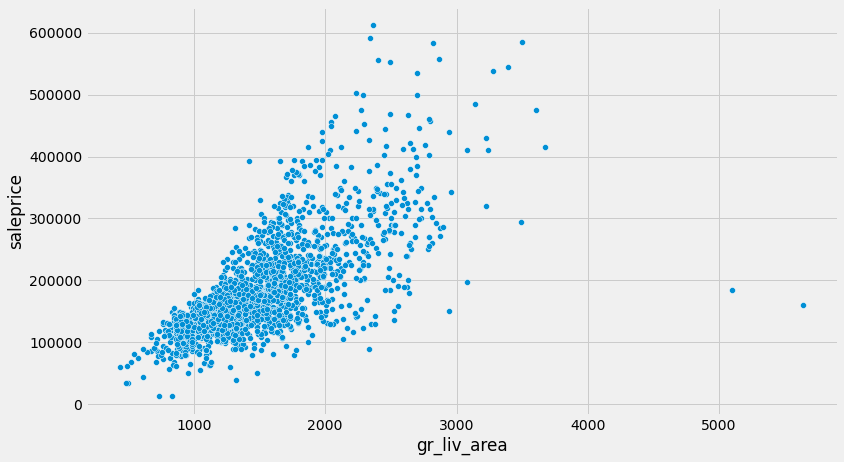

In [2490]:
# Plotting the Gr Live Area with Sale price
plt.figure(figsize=(12,7))
sns.scatterplot(x='gr_liv_area', y='saleprice',data=train_df)

A strong positive correlation is found between `saleprice` and `gr_liv_area`.

In [2491]:
# Rows with Above Grade Living Area Square Ft, drop them as they're outliers
train_df['gr_liv_area'][train_df['gr_liv_area'] > 4000]

960     5642.0
1885    5095.0
Name: gr_liv_area, dtype: float64

In [2492]:
# Drop the outliers for train_df_num, train_df_ord, train_df_nom
train_df = train_df.drop(index=[960,1885])
# train_df_num.head()

### Removing outliers that were above or below 3 standard deviations from their mean values for SalePrice

In [2493]:
outlier_saleprice_pos = train_df['saleprice'].mean() + train_df['saleprice'].std() *3
outlier_saleprice_neg = train_df['saleprice'].mean() - train_df['saleprice'].std() *3

In [2494]:
# Getting the outliers for sale price 
salesprice_outliers = train_df[(train_df['saleprice'] > outlier_saleprice_pos) | (train_df['saleprice'] < outlier_saleprice_neg)]
len(salesprice_outliers.index)

32

In [2495]:
# Drop the outliers for train_df
train_df = train_df.drop(index=salesprice_outliers.index.tolist())

In [2496]:
clean_train_df = train_df.copy()

## Exploratory Data Analysis


### Summary Statistics
Creating a quick overview of each numeric feature.

## EDA on numeric dataframe

In [9]:
clean_train_df.describe().T

NameError: name 'clean_train_df' is not defined

`mas_vnr_area`, `bsmt_full_bath`, `wood_deck_sf`, `2nd_flr_sf` attributes have a square feet of 0 for their median square feet. It seems most houses do not have these attributes.

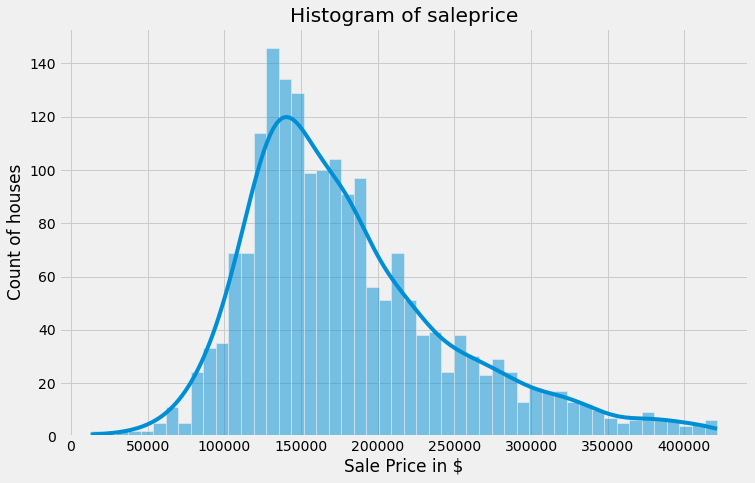

In [2498]:
# Plotting the histogram of saleprice
plt.figure(figsize=(11,7))
sns.histplot(clean_train_df['saleprice'], bins=50, kde=True)

plt.title('Histogram of saleprice')
plt.xlabel('Sale Price in $')
plt.ylabel('Count of houses');

As seen in the histogram, it's a heavy right-tailed histogram containing a lot of outliers. The decision to remove the outliers can be difficult as some of them may provide important information. I've decided to take a natural log-transformation of `saleprice` to transform it into a more normal distribution curve with less extreme values. This results in a log-linear model with linear explanatory variables.

In [2499]:
clean_train_df['saleprice'] = np.log(clean_train_df['saleprice'])
clean_train_df['saleprice']

0       11.779129
1       12.301383
2       11.599103
3       12.066811
4       11.838626
          ...    
2046    12.607366
2047    11.320554
2048    12.083905
2049    11.877569
2050    12.149502
Name: saleprice, Length: 1900, dtype: float64

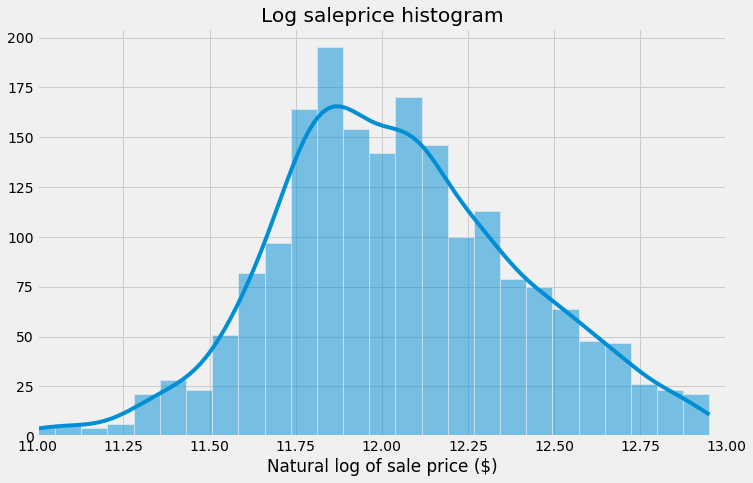

In [2500]:
plt.figure(figsize=(11,7))
sns.histplot(clean_train_df['saleprice'], kde=True)
plt.title('Log saleprice histogram')
plt.xlabel('Natural log of sale price ($)')
plt.ylabel('')
plt.xlim(11,13);

## Saving the cleaned dataframe to csv files

In [2501]:
clean_train_df.to_csv('../datasets/clean_train_df.csv', index=False)

## Correlation between variables with square feet and saleprice

In [2502]:
sq_ft_df = clean_train_df[clean_train_df.columns[clean_train_df.columns.str.contains('sf')]].copy()
sq_ft_df['saleprice'] = clean_train_df['saleprice']
sq_ft_df.head()

,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,wood_deck_sf,open_porch_sf,saleprice
0,533.0,725.0,725.0,754.0,0.0,44.0,11.779129
1,637.0,913.0,913.0,1209.0,0.0,74.0,12.301383
2,731.0,1057.0,1057.0,0.0,0.0,52.0,11.599103
3,0.0,384.0,744.0,700.0,100.0,0.0,12.066811
4,0.0,676.0,831.0,614.0,0.0,59.0,11.838626


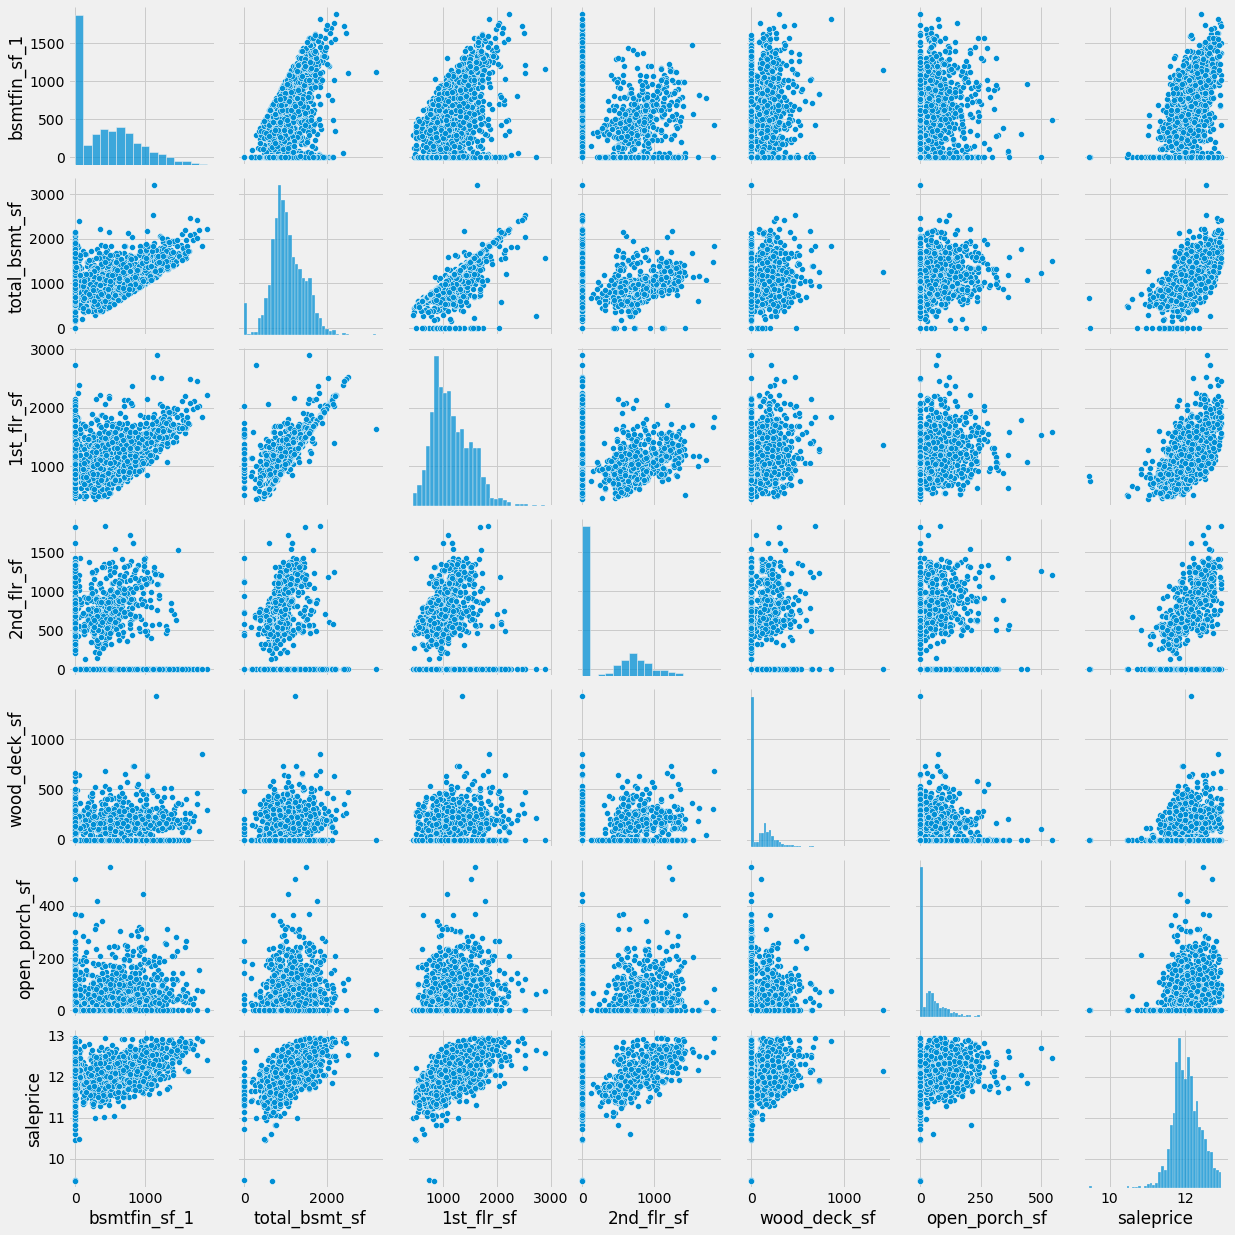

In [2503]:
sns.pairplot(sq_ft_df)

Most variables with square feet in them have strong positive correlation with price.

## Best land contour for a house

In [ ]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice', y='land_contour', data=clean_train_df)
plt.xlabel('Log Sale price', labelpad=20)
plt.ylabel('Land Contour', labelpad=20)

Houses with `HLS`, Hillside with significant slopes from the side and have low land contours have a higher median price and a greater range of pricing.

## Best roof styles

Text(0, 0.5, 'Roof style')

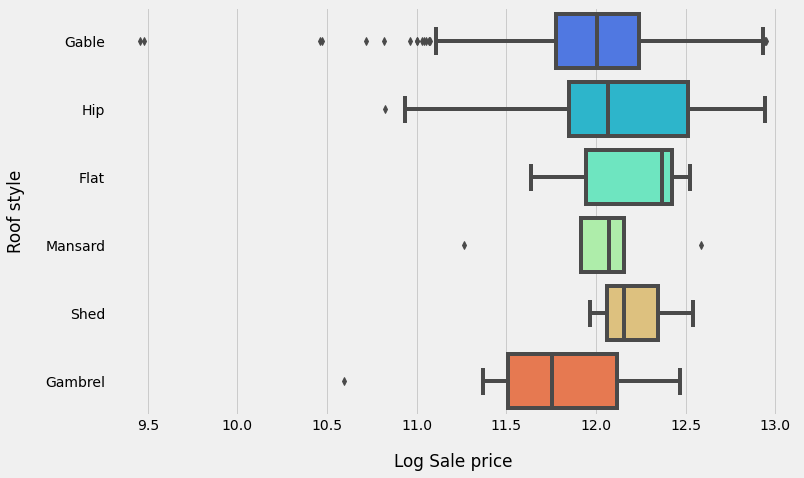

In [2337]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice', y='roof_style', data=clean_train_df, palette='rainbow')
plt.xlabel('Log Sale price', labelpad=20)
plt.ylabel('Roof style', labelpad=20)

# clean_train_df['roof_style']

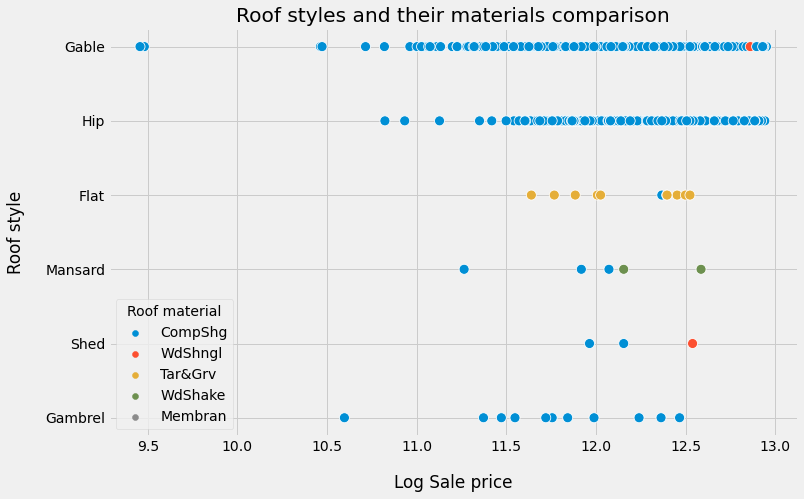

In [2505]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='saleprice', y='roof_style', data=clean_train_df, s=100, hue='roof_matl')
plt.title('Roof styles and their materials comparison')
plt.xlabel('Log Sale price', labelpad=20)
plt.ylabel('Roof style', labelpad=20)
plt.legend(title='Roof material');

Most roof style houses range price falling between 12.0 and 12.5. The `Gambrel` has the lowest median price. The most used type of `roof_style` is `Gable` and `Hip` and almost all of them are made of Standard (Composite) Shingle. For `Flat` type of roof style, they're mostly made of Gravel & Tar.

## Fireplaces and their qualities

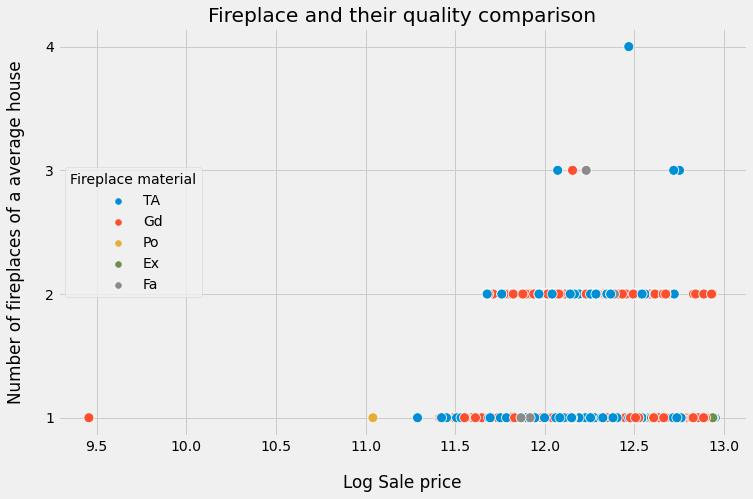

In [2339]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='saleprice', y='fireplaces', data=clean_train_df, hue='fireplace_qu', s=100)

plt.title('Fireplace and their quality comparison')

plt.xlabel('Log Sale price', labelpad=20)
plt.yticks(np.arange(1,5), [1,2,3,4])
plt.ylabel('Number of fireplaces of a average house', labelpad=20)

plt.legend(title='Fireplace material', loc='center left');

Text(0, 0.5, 'Fireplace quality')

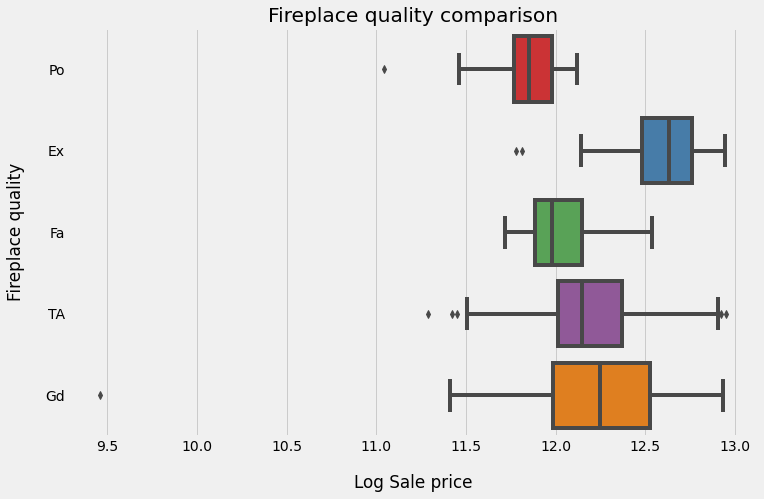

In [2340]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice', y='fireplace_qu', data=clean_train_df, order=['Po', 'Ex', 'Fa', 'TA', 'Gd'], palette='Set1')

plt.title('Fireplace quality comparison')

plt.xlabel('Log Sale price', labelpad=20)
plt.ylabel('Fireplace quality', labelpad=20)

In [2341]:
clean_train_df.groupby('fireplace_qu').sum()['fireplaces']

fireplace_qu
Ex     28
Fa     70
Gd    553
Po     30
TA    471
Name: fireplaces, dtype: int64

Majority of the houses have at least 1 fireplace and their quality is either good or average. 

The more higher end their fireplace quality is, the higher the median sale price becomes as seen in the boxplot. This can be said the same for the lower quality fireplace as the quality dips, the lower the median price becomes. As most houses have either good or average fireplace quality, their sale price ranges from 12.0 to 12.5. The poor and expensive quality fireplaces fall outside that range.

## Neighborhood sale price and their kitchen quality

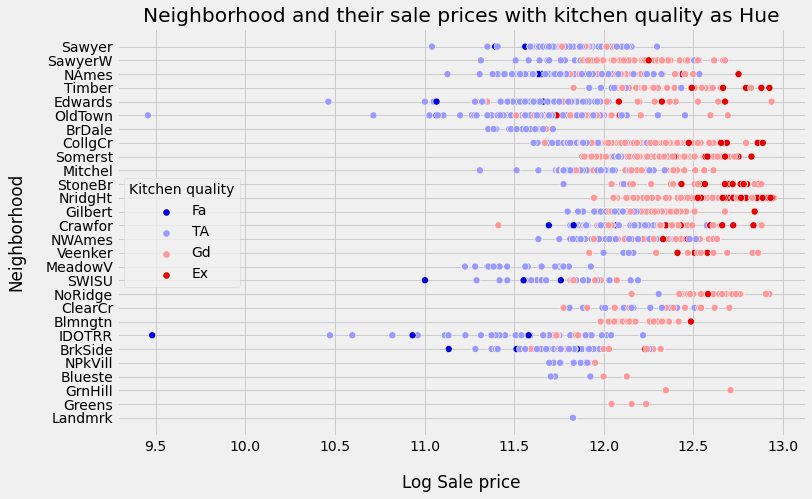

In [2342]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='saleprice', y='neighborhood',data=clean_train_df, hue='kitchen_qual', hue_order=['Fa', 'TA', 'Gd', 'Ex'], s=50, palette='seismic')

plt.title('Neighborhood and their sale prices with kitchen quality as Hue')
plt.xlabel('Log Sale price', labelpad=20)
plt.ylabel('Neighborhood', labelpad=20)

plt.legend(title='Kitchen quality', loc='center left');

Typical average kitchen quality falls between the *11.5 to 12.0* range while the good kitchen quality falls between *12.0 to 12.5* range. This shows that generally the more expensive neighborhood have better kitchen quality which leads to a higher sale price. There seems to be a positive correlation between `kitchen_qu` and the `saleprice`.

In [ ]:
def single_boxplots(dataframe, list_of_cols, title='test', figsize=(10,7), c='red'):
    plt.figure(figsize=figsize)
    sns.boxplot(data=dataframe[list_of_cols], orient='h', color=c, whis=1.5)
    
    plt.title(title, fontsize=20)
    plt.xlabel(list_of_cols[0] + ' values', labelpad=20)
#     plt.xticks(ticks=tick_list.tolist(), labels=[str(i) for i in tick_list]) # Ticks = np.arange(25,300,25)
#     plt.xlim(10,400)
#     plt.yticks(ticks=[i for i in range(len(list_of_cols))],labels=list_of_cols)
#     plt.ylabel('Lot Frontage')

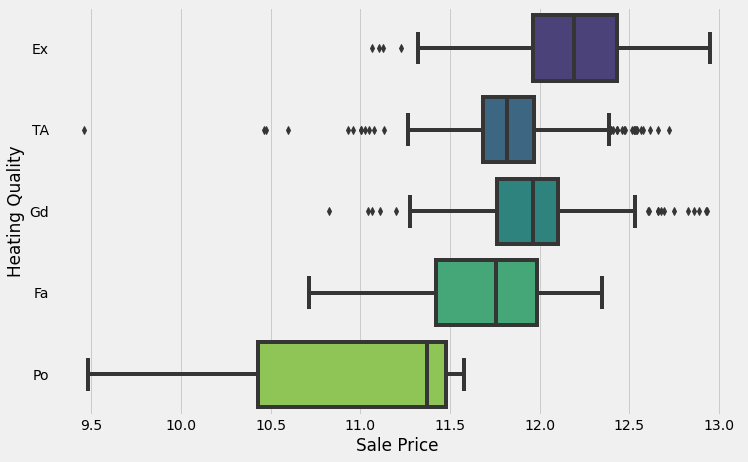

In [2344]:
# Boxplot of saleprice and heating_qc variables
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='heating_qc',data=clean_train_df, palette='viridis')
plt.xlabel('Sale Price')
plt.ylabel('Heating Quality');

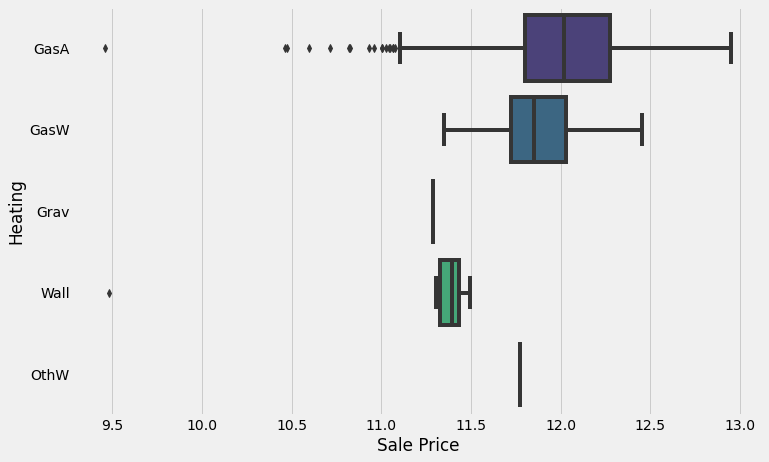

In [2506]:
# Boxplot of saleprice and heating_qc variables
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='heating',data=clean_train_df, palette='viridis')
plt.xlabel('Sale Price')
plt.ylabel('Heating');

Most houses have an excellent quality gas forced warm air furnace. This shows that houses that have Gas A and have an excellent heat quality tend to sell at a high price compared to other categories and quality. 

In [2346]:
clean_train_df.to_csv('../datasets/clean_train_df.csv')